# EDA-MINI PROJECT

## Problem Statement

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


## About Data:

The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.


## Data Preprocessing:

In [1]:
## Loading Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from scipy.stats import norm,skew
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading data

fifa=pd.read_csv("fifa.csv")
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
## Loading data

fifa_ind=pd.read_csv("fifa_+variable_information.csv")
fifa_ind

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [4]:
## statistical characteristics of the data

fifa.describe(include="all")

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,18207,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,17194,NaN,18207,164,164,NaN,NaN,651,679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/198285.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/1.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,11,NaN,1,1662,1662,NaN,NaN,33,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


In [5]:
## normalizing the column name

fifa.columns=fifa.columns.str.replace(" ","_")
fifa.columns=fifa.columns.str.replace(".","_")

In [6]:
#Numerical Features,Categorical Features, Alphanumeric Features present in the data

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club_Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred_Foot            18159 non-null  object 
 13  International_Reputation  18159 non-null  float64
 14  Weak_F

In [7]:
## Find out the no.of.null vals present in the features

fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club_Logo                       0
Value                           0
Wage                            0
Preferred_Foot                 48
International_Reputation       48
Weak_Foot                      48
Skill_Moves                    48
Work_Rate                      48
Body_Type                      48
Position                       60
Jersey_Number                  60
Joined                       1553
Loaned_From                 16943
Contract_Valid_Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

## Features val and dtype changed for analysis

In [8]:
#Dropping the columns
fifa.drop(columns=['Photo','Flag','Club_Logo'],inplace=True,axis=1)

In [9]:
# Function to change "Value" & "Wage" feature

def vals(x):
    try:
        a=float(x[1:-1])
        b=x[-1:]
        if "M" in b:
            a=(a)*1000000
        elif "K" in b:
            a=(a)*1000
    except ValueError:
        a = 0
    return a

In [10]:
fifa['Value']=fifa['Value'].apply(vals)
fifa['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [11]:
fifa['Wage']=fifa['Wage'].apply(vals)
fifa['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [12]:
# Function to change "Joined" feature:

def year(x):
    try:
        a=int(x[-4:])  
    except ValueError:
        a = 0
    return a

In [13]:
## Doing Null Val treatment for feature for analysis

fifa['Joined']=fifa['Joined'].fillna('0')

In [14]:
fifa['Joined']=fifa['Joined'].apply(year)
fifa['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [15]:
fifa['Contract_Valid_Until']=pd.to_datetime(fifa['Contract_Valid_Until'])
fifa['Contract_Valid_Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract_Valid_Until, dtype: datetime64[ns]

In [16]:
fifa['Height']=fifa['Height'].str.replace("'",".")
fifa['Height']=fifa['Height'].astype(float)
fifa['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [17]:
fifa['Weight']=fifa['Weight'].str.replace("lbs"," ")
fifa['Weight']=fifa['Weight'].astype(float)
fifa['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [18]:
# Function to change "Release_Clause" feature 

def remove_from(x):
    temp = x.replace('€', '')
    if 'M' in temp:
        temp = float(temp.replace('M', ''))*1000000
    elif 'K' in temp:
        temp = float(temp.replace('K', ''))*1000
    return float(temp)

In [19]:
fifa['Release_Clause']=fifa["Release_Clause"].astype(str).apply(remove_from)
fifa['Release_Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release_Clause, dtype: float64

In [20]:
#Filling missing values with mean.

fifa['Value']=fifa['Value'].fillna(value=fifa['Value'].mean())
fifa['Wage']=fifa['Wage'].fillna(value=fifa['Wage'].mean())
fifa['International_Reputation']=fifa['International_Reputation'].fillna(value=fifa['International_Reputation'].mean())
fifa['Height']=fifa['Height'].fillna(value=fifa['Height'].mean())
fifa['Weight']=fifa['Weight'].fillna(value=fifa['Weight'].mean())
fifa['Release_Clause']=fifa['Release_Clause'].fillna(value=fifa['Release_Clause'].mean())
fifa['Overall']=fifa['Overall'].fillna(value=fifa['Overall'].mean())
fifa['Position']=fifa['Position'].fillna(value='None')

## Exploratory Analysis:

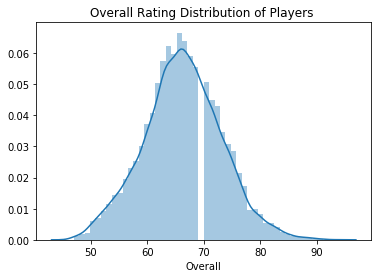

In [21]:
# Plotting the distribution of Overall rating for all players. 

sns.distplot(fifa.Overall)
plt.title("Overall Rating Distribution of Players ")
plt.savefig("Distribution.png",dpi=100)
plt.show()

# Observation:

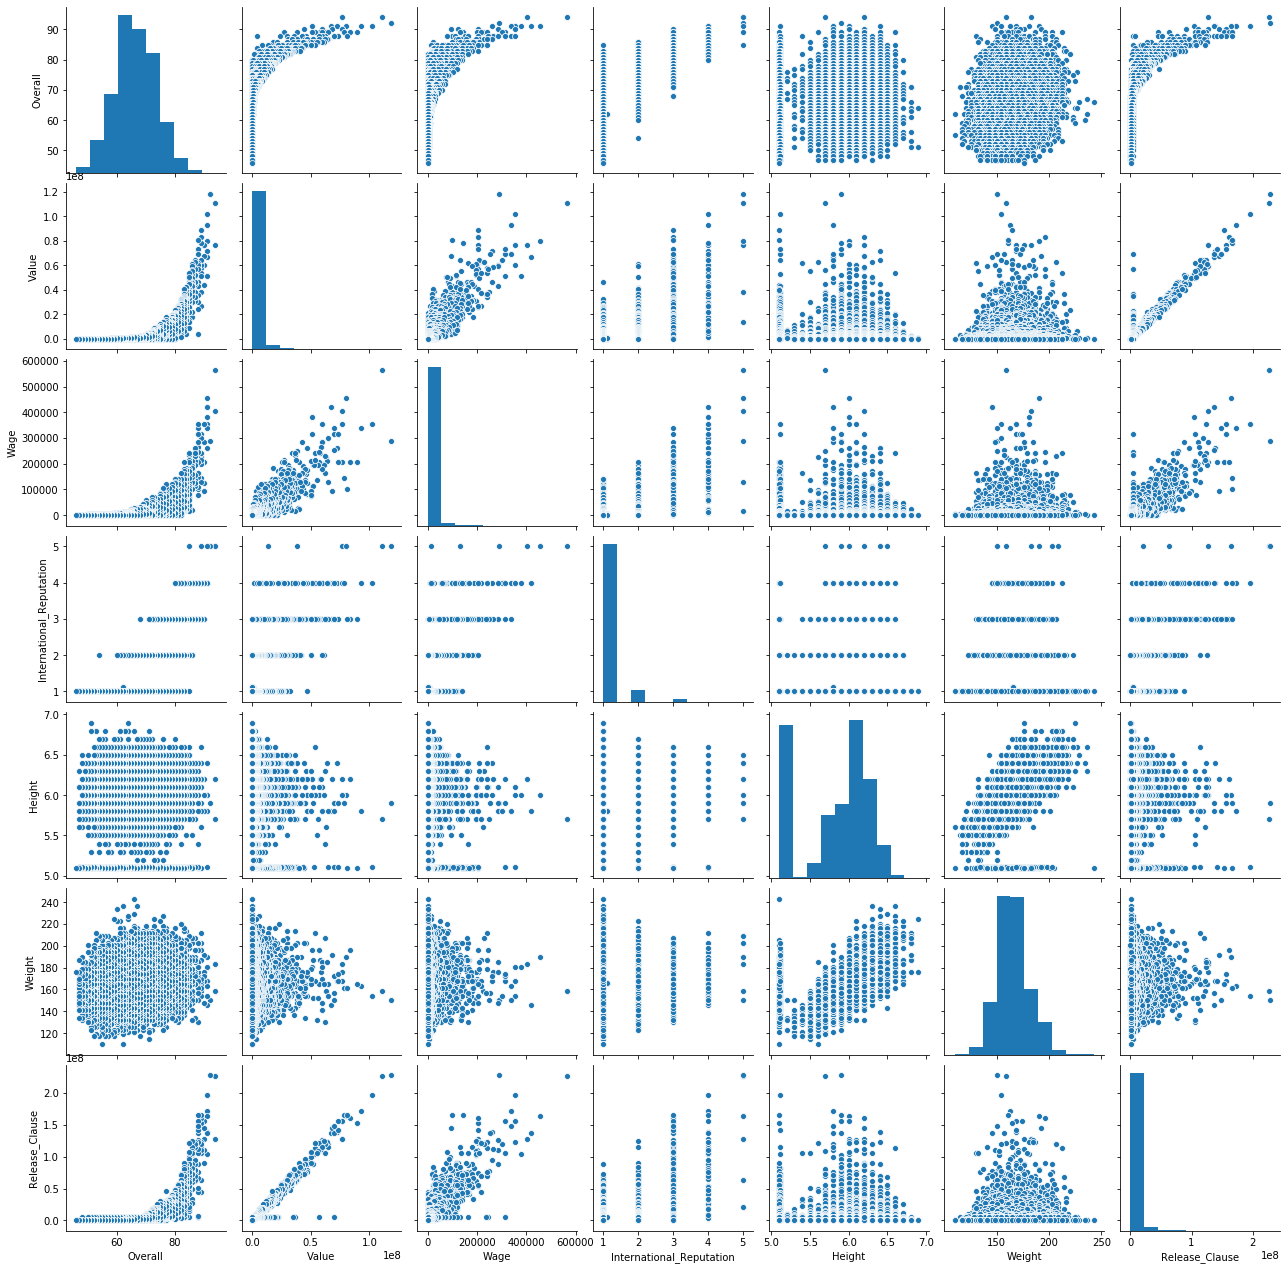

In [22]:
# Generating pair plots for Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

sns.pairplot(data=fifa[['Overall','Value','Wage','International_Reputation','Height','Weight','Release_Clause']])
plt.savefig("Pairplot.png",dpi=700)
plt.show()

# Observation:

In [23]:
# Generating a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

Top20=fifa[(fifa['Contract_Valid_Until']>='2020-01-01') & (fifa['Contract_Valid_Until']<='2020-12-31')].sort_values(by=['Overall'],ascending=[False],axis=0).head(20)
Top20.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0


In [24]:
# the average wage for the top 20 players ranked by Overall score and whose contract expires in 2020

Top20.Wage.mean()

205450.0

In [25]:
# the average age

round(Top20.Age.mean(),0)

31.0

NameError: name 'pt' is not defined

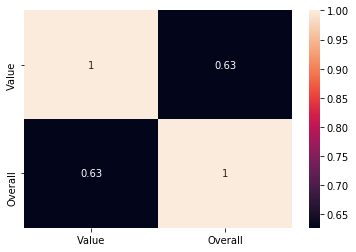

In [26]:
# correlation between the Overall rating and Value for these players

sns.heatmap(fifa[['Value','Overall']].corr(),annot=True)
pt.title("correlation between the Overall rating and Value",fontsize=15)
plt.savefig("Correlation.png",dpi=100)
plt.show()

# Observation:

In [27]:
# Generating table containing the top 5 players by Overall rating for each unique position

Top5=fifa.sort_values(by=['Overall'],ascending=[False]).groupby(by='Position').head(5).sort_values(['Position','Overall'], ascending=[False,False])
Top5

# Other Methods
# Top5=fifa.sort_values(by=['Overall'],ascending=[False]).groupby(by='Position').head(5)
# Top5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0


In [28]:
# Checking whether any players appearing in more than one Position in the Top5

Top5[Top5.Name.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause


In [29]:
# Average wage one can expect to pay for the top 5 in every position
Top5.groupby(by='Position').Wage.mean().sort_values(ascending=False)

Position
ST      294000.0
LW      261000.0
RCM     257400.0
RCB     219000.0
RW      202000.0
CDM     199200.0
LCM     195400.0
GK      192800.0
LB      177200.0
CAM     174000.0
LM      169000.0
LCB     162000.0
RB      155400.0
RF      148000.0
LDM     138000.0
RM      133000.0
CM      130600.0
LS      130600.0
RS      130400.0
CB      124800.0
LF      123200.0
RDM     105000.0
LAM      81600.0
CF       47400.0
RAM      46600.0
RWB      44200.0
LWB      33000.0
None         0.0
Name: Wage, dtype: float64

# <span style="font-family: Arial; font-weight:bold;font-size:3em;color:##8cff00;"> THE END